In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [120]:
dados = pd.read_csv('../scrapped-content/full_cities_analysis.csv', sep=',', keep_default_na=False, true_values=["t"], false_values=["f"])

In [121]:
dados.head()


,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front
0,1100015,2010,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,233552.00,0.89,-1712,-0.07,False,1327,22516,False,False,False
1,1100023,2010,Ariquemes,RO,Norte,1,,True,False,False,...,1214136.00,0.89,19578,0.21,False,1102,111148,False,False,False
2,1100031,2010,Cabixi,RO,Norte,1,,True,False,False,...,70348.00,1.01,-1154,-0.19,False,1502,5067,False,False,False
3,1100049,2010,Cacoal,RO,Norte,1,,True,False,False,...,1074150.00,0.91,7457,0.09,False,1272,86416,False,False,False
4,1100056,2010,Cerejeiras,RO,Norte,1,,True,False,False,...,284833.00,1.28,-851,-0.05,False,1467,16088,False,False,False


In [122]:
dados['is_metropolitan_region'] = [True if len(x) > 0 else False for x in dados['metropolitan_region']]

In [123]:

dados['log_gdp_per_capita'] = np.log(dados['gdp_per_capita_brl'])

In [124]:
dados['gdp_per_capita_brl_growth'] = pd.to_numeric(dados['gdp_per_capita_brl_growth'], errors='coerce')
dados['gdp_per_capita_brl_growth_percent'] = pd.to_numeric(dados['gdp_per_capita_brl_growth_percent'], errors='coerce')
dados['total_gdp_1000_brl_growth'] = pd.to_numeric(dados['total_gdp_1000_brl_growth'], errors='coerce')
dados['total_gdp_1000_brl_growth_percent'] = pd.to_numeric(dados['total_gdp_1000_brl_growth_percent'], errors='coerce')
dados['population2021'] = pd.to_numeric(dados['population2021'], errors='coerce')
dados['population_growth'] = pd.to_numeric(dados['population_growth'], errors='coerce')
dados['population_growth_percent'] = pd.to_numeric(dados['population_growth_percent'], errors='coerce')
dados['gdp_per_capita_brl_growth_percent_log'] = np.log(dados['gdp_per_capita_brl_growth_percent'])
dados['total_gdp_1000_brl_growth_percent_log'] = np.log(dados['total_gdp_1000_brl_growth_percent'])
dados.head()


C:\Users\plini\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\plini\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\plini\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\plini\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
0,1100015,2010,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,False,1327,22516.0,False,False,False,False,9.280909,0.009950,-0.116534
1,1100023,2010,Ariquemes,RO,Norte,1,,True,False,False,...,False,1102,111148.0,False,False,False,False,9.622706,-0.544727,-0.116534
2,1100031,2010,Cabixi,RO,Norte,1,,True,False,False,...,False,1502,5067.0,False,False,False,False,9.308702,0.329304,0.009950
3,1100049,2010,Cacoal,RO,Norte,1,,True,False,False,...,False,1272,86416.0,False,False,False,False,9.622129,-0.287682,-0.094311
4,1100056,2010,Cerejeiras,RO,Norte,1,,True,False,False,...,False,1467,16088.0,False,False,False,False,9.475551,0.322083,0.246860


In [125]:
dados_2019 = dados[dados.year == 2019]
dados_2019.head()

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
50115,1100015,2019,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,False,1327,22516.0,False,False,False,False,9.980482,0.009950,-0.116534
50116,1100023,2019,Ariquemes,RO,Norte,1,,True,False,False,...,False,1102,111148.0,False,False,False,False,10.081984,-0.544727,-0.116534
50117,1100031,2019,Cabixi,RO,Norte,1,,True,False,False,...,False,1502,5067.0,False,False,False,False,10.179139,0.329304,0.009950
50118,1100049,2019,Cacoal,RO,Norte,1,,True,False,False,...,False,1272,86416.0,False,False,False,False,10.184294,-0.287682,-0.094311
50119,1100056,2019,Cerejeiras,RO,Norte,1,,True,False,False,...,False,1467,16088.0,False,False,False,False,10.343404,0.322083,0.246860


In [126]:
dados.describe().round(2)

,city_id,year,greater_region_code,total_gdp_1000_brl,gdp_per_capita_brl,public_expending_value_1000_brl,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,taxes_value_1000_brl,...,gdp_per_capita_brl_growth_percent,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,distance_equator_km,population2021,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
count,55685.00,55685.00,55685.00,5.568500e+04,55685.00,5.568500e+04,55685.00,55685.00,5.568500e+04,5.568500e+04,...,55650.00,5.565000e+04,55650.00,55650.00,55650.00,55685.00,55650.00,55685.00,54690.00,54960.00
mean,3253429.67,2014.50,2.90,1.031363e+06,18961.03,1.496661e+05,45431.24,207058.93,4.829187e+05,1.467619e+05,...,1.11,6.292860e+05,1.24,3753.80,0.07,1832.67,38323.30,9.55,-inf,-inf
std,984714.21,2.87,1.09,1.042699e+07,21034.77,1.391605e+06,81787.85,1333025.07,6.410927e+06,1.907779e+06,...,1.21,5.379799e+06,1.31,21240.83,0.11,917.96,224369.07,0.73,NaN,NaN
min,1100015.00,2010.00,1.00,4.199000e+03,301.60,4.227000e+03,0.00,99.00,1.207000e+03,2.100000e+01,...,-0.81,-9.586758e+06,-0.78,-28162.00,-0.76,3.00,771.00,5.71,-inf,-inf
25%,2512101.00,2012.00,2.00,6.326900e+04,7999.42,2.113700e+04,8731.00,3221.00,1.488300e+04,2.437000e+03,...,0.74,4.023300e+04,0.85,69.00,0.01,945.00,5453.00,8.99,-0.27,-0.15
50%,3146255.00,2015.00,3.00,1.410570e+05,13591.61,4.044700e+04,21816.00,10180.00,3.882600e+04,7.359000e+03,...,1.00,9.620600e+04,1.11,613.00,0.06,2014.00,11733.00,9.52,0.01,0.10
75%,4119152.00,2017.00,4.00,3.816070e+05,23197.00,8.765500e+04,49489.00,56445.00,1.246540e+05,2.820100e+04,...,1.28,2.611710e+05,1.39,2240.00,0.12,2542.00,25771.00,10.05,0.25,0.33
max,5300108.00,2019.00,5.00,7.638060e+08,815697.76,1.072192e+08,2482542.00,66893050.00,5.283801e+08,1.324779e+08,...,37.90,3.133140e+08,42.67,1080253.00,0.88,3749.00,12396372.00,13.61,3.63,3.75


<AxesSubplot:title={'center':'Gdp per capita year'}, xlabel='Year', ylabel='$$$'>

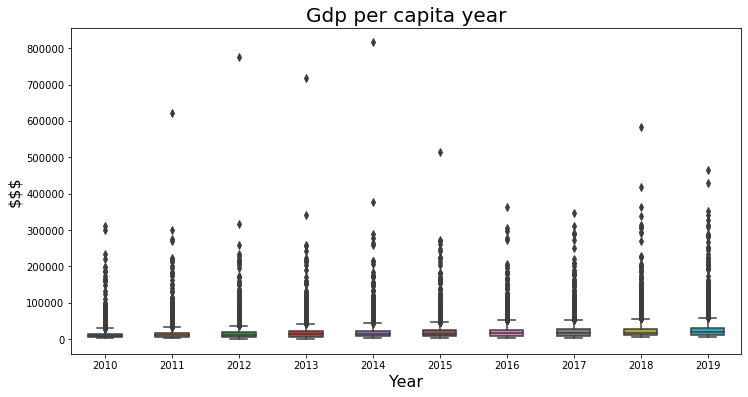

In [127]:
ax = sns.boxplot(y='gdp_per_capita_brl', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax

In [128]:
dados.corr().round(4)

,city_id,year,greater_region_code,is_legal_amazon,is_semi_arid,is_sao_paulo_region,total_gdp_1000_brl,gdp_per_capita_brl,public_expending_value_1000_brl,agro_value_1000_brl,...,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
city_id,1.0000,0.0002,0.9766,-0.3930,-0.3693,0.0365,0.0238,0.3140,0.0208,0.1842,...,-0.0237,0.7394,-0.0022,-0.3165,-0.1152,-0.0864,0.1225,0.5227,-0.0211,-0.0323
year,0.0002,1.0000,0.0002,0.0001,-0.0002,-0.0000,0.0185,0.1770,0.0239,0.1112,...,-0.0000,0.0002,0.0000,-0.0001,0.0004,0.0002,0.0004,0.2955,0.0000,0.0000
greater_region_code,0.9766,0.0002,1.0000,-0.3437,-0.4108,0.0122,0.0193,0.3118,0.0178,0.1887,...,-0.0219,0.7312,-0.0072,-0.3056,-0.1314,-0.0922,0.1125,0.5205,0.0014,-0.0094
is_legal_amazon,-0.3930,0.0001,-0.3437,1.0000,-0.2171,-0.0520,-0.0155,-0.0697,-0.0059,0.1143,...,0.0393,-0.4546,-0.0027,0.4170,0.0551,0.0200,-0.1071,-0.1164,0.0743,0.1261
is_semi_arid,-0.3693,-0.0002,-0.4108,-0.2171,1.0000,-0.0702,-0.0418,-0.2765,-0.0313,-0.1793,...,-0.0316,-0.5093,-0.0390,-0.0492,-0.1003,-0.0613,-0.0870,-0.4843,0.1019,0.0706
is_sao_paulo_region,0.0365,-0.0000,0.0122,-0.0520,-0.0702,1.0000,0.1797,0.1623,0.0864,-0.0323,...,0.0112,0.1084,0.1739,-0.0329,-0.0016,0.0090,0.2218,0.1537,-0.1262,-0.0625
total_gdp_1000_brl,0.0238,0.0185,0.0193,-0.0155,-0.0418,0.1797,1.0000,0.1290,0.7572,0.0691,...,0.4600,0.0388,0.9504,-0.0191,0.0583,0.0677,0.1005,0.1289,-0.0537,-0.0348
gdp_per_capita_brl,0.3140,0.1770,0.3118,-0.0697,-0.2765,0.1623,0.1290,1.0000,0.0825,0.2803,...,0.0416,0.3471,0.0781,-0.0786,0.0505,0.0724,0.1222,0.7854,-0.0154,0.0236
public_expending_value_1000_brl,0.0208,0.0239,0.0178,-0.0059,-0.0313,0.0864,0.7572,0.0825,1.0000,0.1222,...,0.4718,0.0132,0.7057,-0.0162,0.0670,0.0717,0.0899,0.0949,-0.0465,-0.0279
agro_value_1000_brl,0.1842,0.1112,0.1887,0.1143,-0.1793,-0.0323,0.0691,0.2803,0.1222,1.0000,...,0.0399,0.0966,0.0696,-0.0055,-0.0215,-0.0189,-0.0249,0.3717,0.0398,0.0925


C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='gdp_per_capita_brl', ylabel='Gdp per capita'>

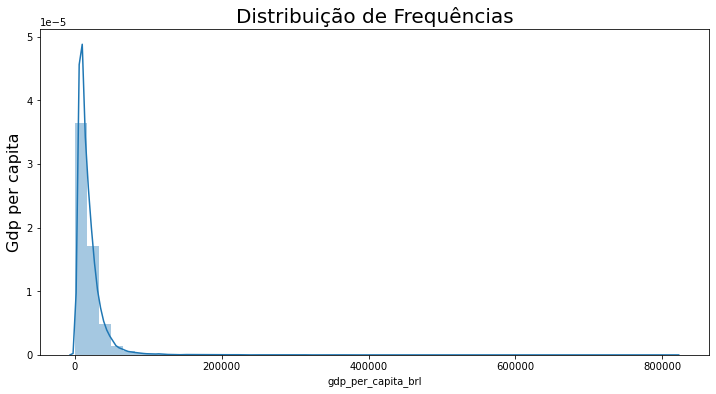

In [129]:
ax = sns.distplot(dados['gdp_per_capita_brl'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

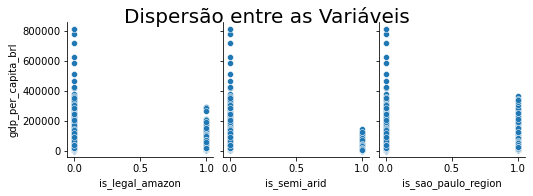

In [130]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Log'}, xlabel='log_gdp_per_capita', ylabel='Gdp per capita'>

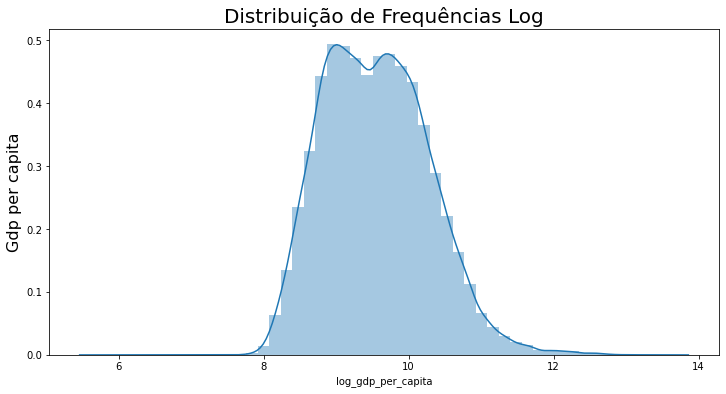

In [131]:
ax = sns.distplot(dados['log_gdp_per_capita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Log', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='Year', ylabel='$$$'>

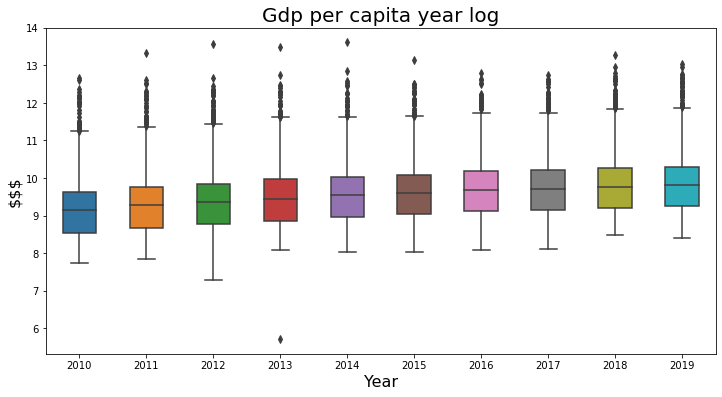

In [132]:
ax = sns.boxplot(y='log_gdp_per_capita', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='SemiArid', ylabel='$$$'>

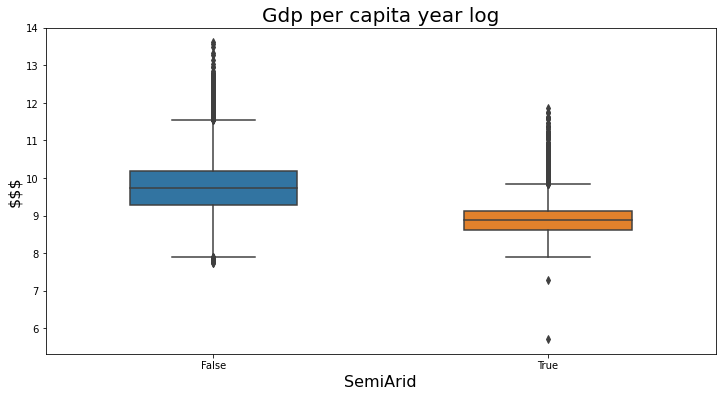

In [133]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_semi_arid', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('SemiArid', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='Is Legal Amazon?', ylabel='$$$'>

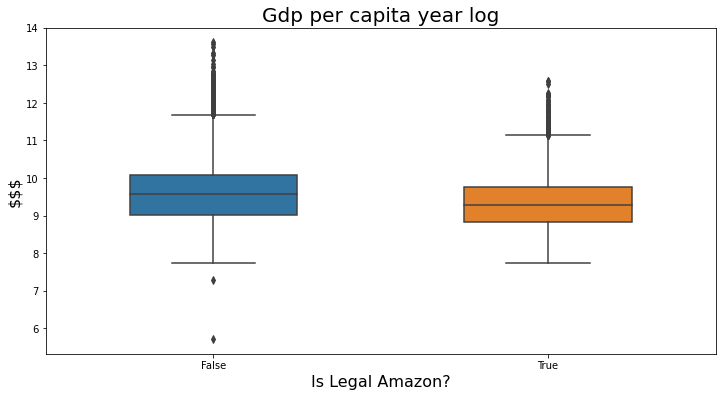

In [134]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_legal_amazon', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is Legal Amazon?', fontsize=16)
ax

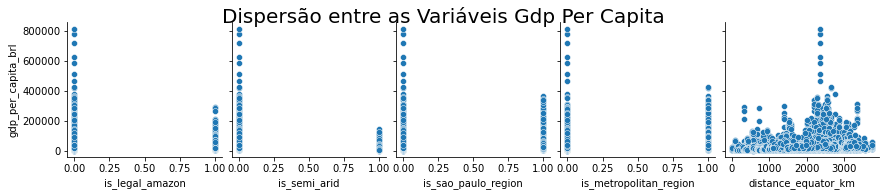

In [135]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Per Capita', fontsize=20, y=1.05)
ax

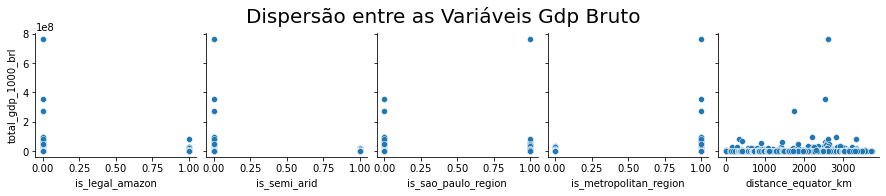

In [136]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Bruto', fontsize=20, y=1.05)
ax

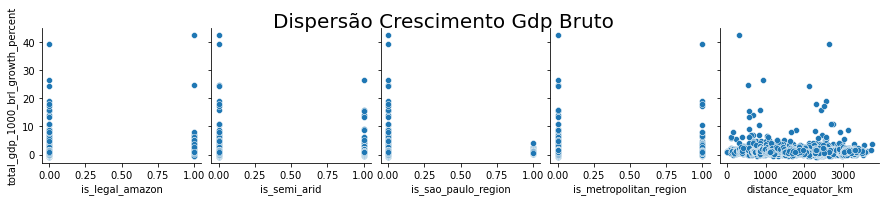

In [137]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão Crescimento Gdp Bruto', fontsize=20, y=1.05)
ax

<AxesSubplot:title={'center':'total_gdp_1000_brl_growth_percent_log'}, xlabel='SemiArid', ylabel='%'>

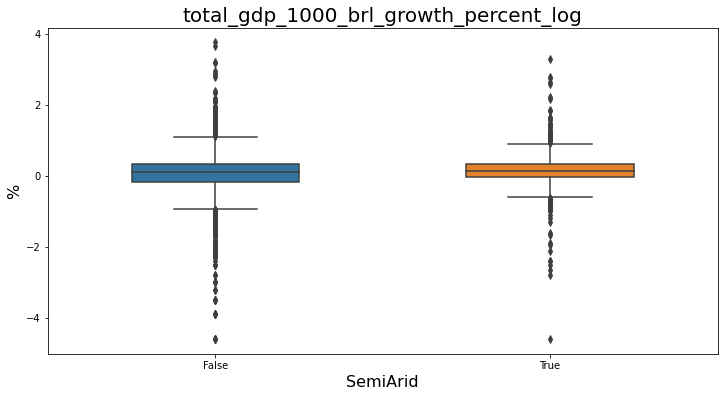

In [138]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_semi_arid', data=dados_2019, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('total_gdp_1000_brl_growth_percent_log', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('SemiArid', fontsize=16)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento bruto %'}, xlabel='total_gdp_1000_brl_growth_percent', ylabel='total_gdp_1000_brl_growth_percent'>

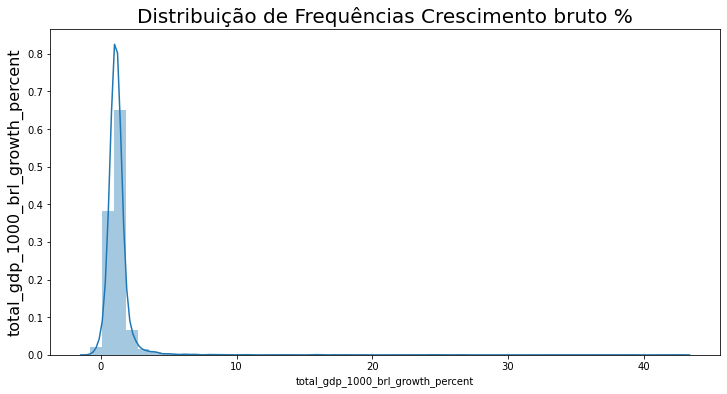

In [139]:
ax = sns.distplot(dados_2019['total_gdp_1000_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento bruto %', fontsize=20)
ax.set_ylabel('total_gdp_1000_brl_growth_percent', fontsize=16)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento per capita %'}, xlabel='gdp_per_capita_brl_growth_percent', ylabel='gdp_per_capita_brl_growth_percent'>

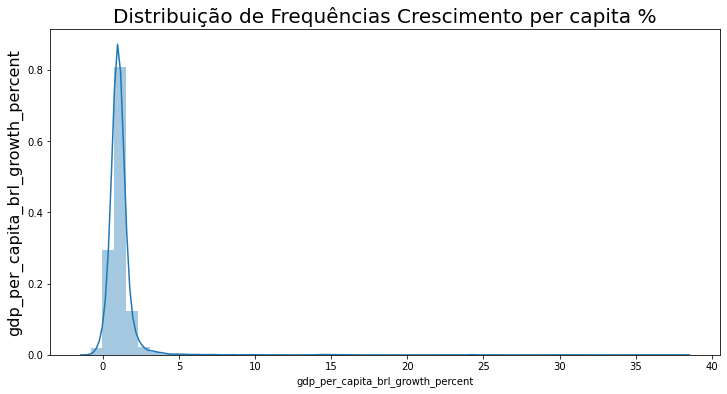

In [140]:
ax = sns.distplot(dados_2019['gdp_per_capita_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento per capita %', fontsize=20)
ax.set_ylabel('gdp_per_capita_brl_growth_percent', fontsize=16)
ax

In [141]:
dados_2019_100k_cities = dados_2019[dados_2019.population2021 > 100000]
dados_2019_100k_cities.shape

(326, 35)

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento per capita % +100mil hab.'}, xlabel='gdp_per_capita_brl_growth_percent', ylabel='gdp_per_capita_brl_growth_percent'>

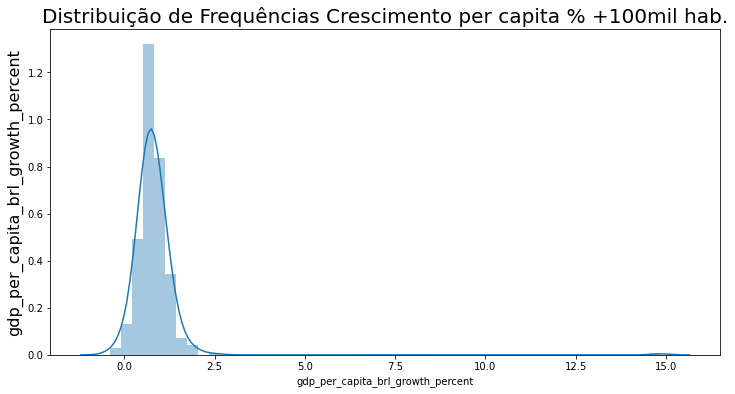

In [142]:
ax = sns.distplot(dados_2019_100k_cities['gdp_per_capita_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento per capita % +100mil hab.', fontsize=20)
ax.set_ylabel('gdp_per_capita_brl_growth_percent', fontsize=16)
ax

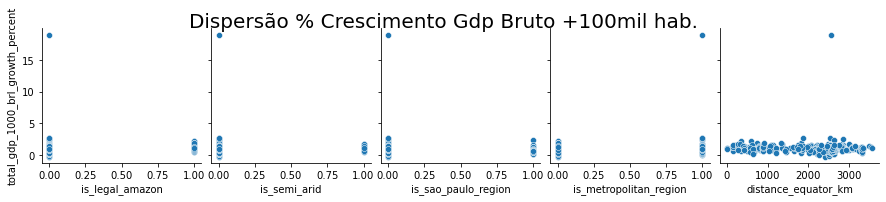

In [143]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='total_gdp_1000_brl_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão % Crescimento Gdp Bruto +100mil hab.', fontsize=20, y=1.05)
ax

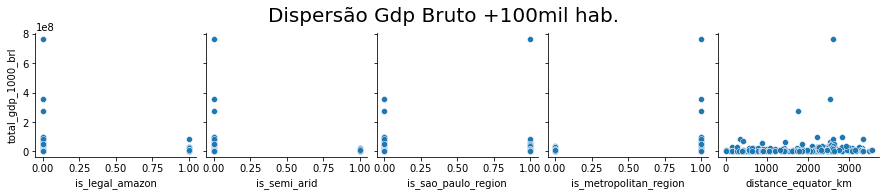

In [144]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='total_gdp_1000_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão Gdp Bruto +100mil hab.', fontsize=20, y=1.05)
ax

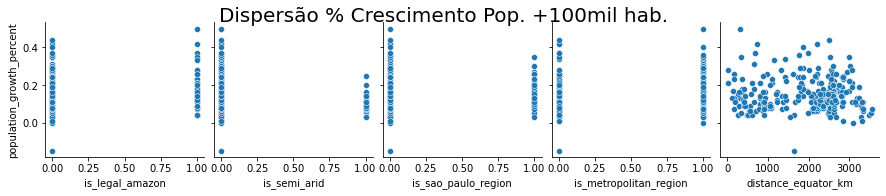

In [145]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='population_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão % Crescimento Pop. +100mil hab.', fontsize=20, y=1.05)
ax

<AxesSubplot:title={'center':'Population Growth Legal Amazon'}, xlabel='Is Legal Amazon?', ylabel='$$$'>

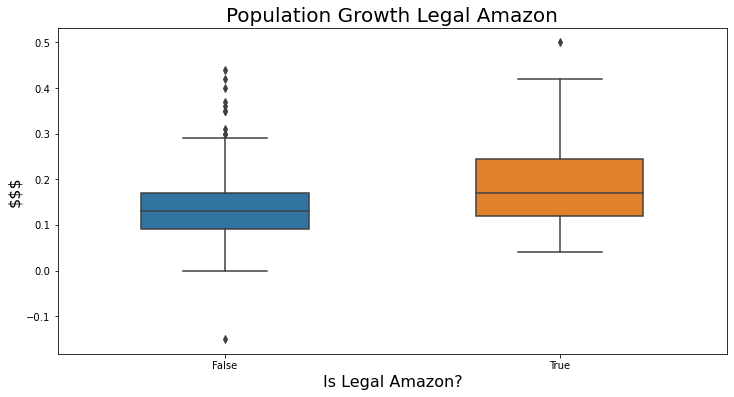

In [146]:
ax = sns.boxplot(y='population_growth_percent', x='is_legal_amazon', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth Legal Amazon', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is Legal Amazon?', fontsize=16)
ax

<AxesSubplot:title={'center':'Population Growth Semi Arid'}, xlabel='Is Semi Arid?', ylabel='$$$'>

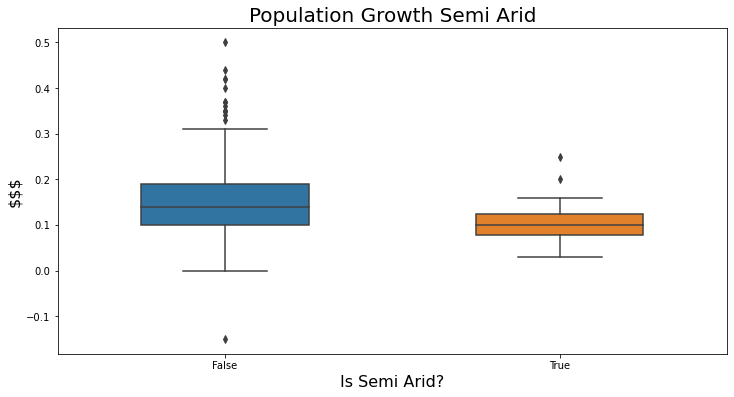

In [147]:
ax = sns.boxplot(y='population_growth_percent', x='is_semi_arid', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth Semi Arid', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is Semi Arid?', fontsize=16)
ax

<AxesSubplot:title={'center':'Population growth Capitals'}, xlabel='Is a Capital?', ylabel='$$$'>

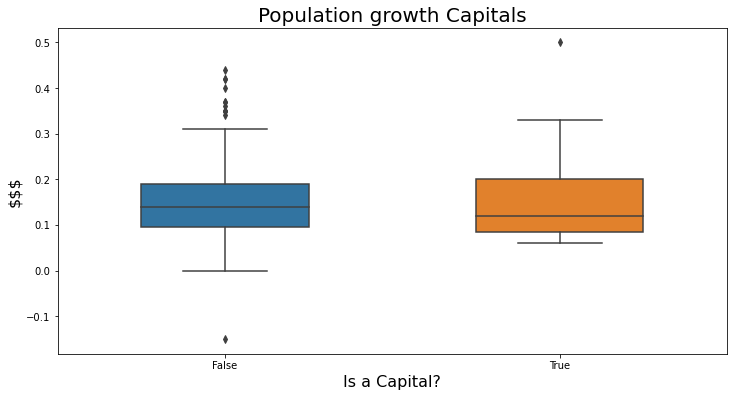

In [148]:
ax = sns.boxplot(y='population_growth_percent', x='is_capital', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population growth Capitals', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is a Capital?', fontsize=16)
ax

<AxesSubplot:title={'center':'Population Growth Metropolitan regions'}, xlabel='Is metropolitan region?', ylabel='$$$'>

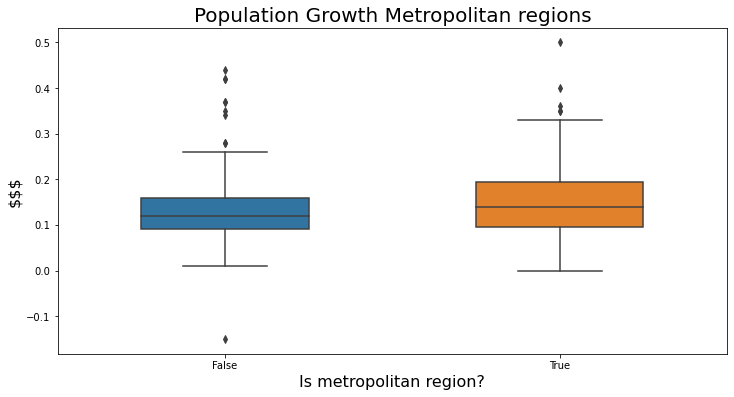

In [149]:
ax = sns.boxplot(y='population_growth_percent', x='is_metropolitan_region', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth Metropolitan regions', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is metropolitan region?', fontsize=16)
ax

<AxesSubplot:title={'center':'Population Growth Greater regions'}, xlabel='Greater Region Name', ylabel='$$$'>

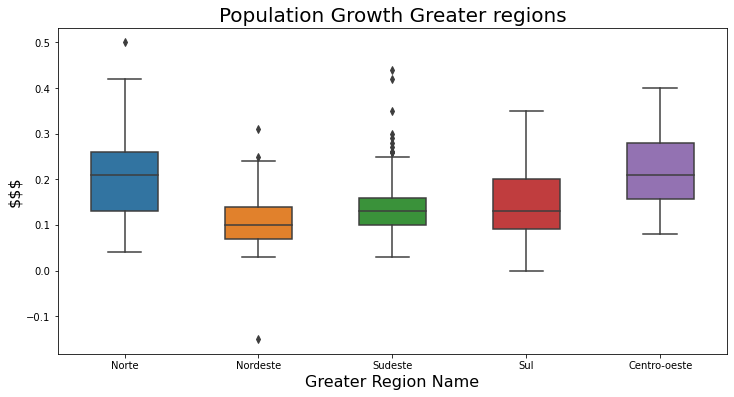

In [150]:
ax = sns.boxplot(y='population_growth_percent', x='greater_region_name', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth Greater regions', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Greater Region Name', fontsize=16)
ax

<AxesSubplot:title={'center':'Population Growth Matopiba'}, xlabel='Is Matopiba?', ylabel='$$$'>

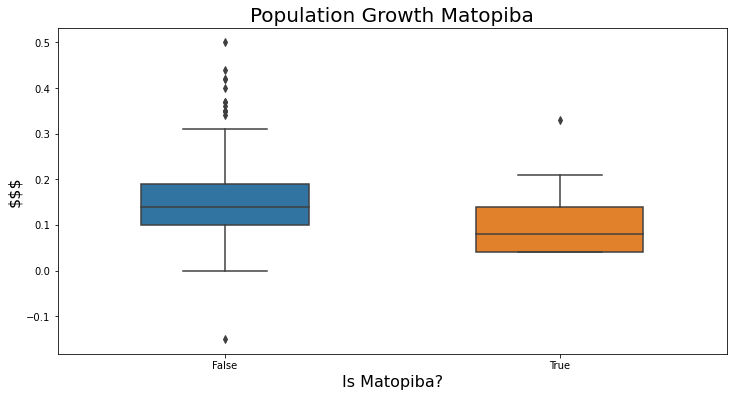

In [151]:
ax = sns.boxplot(y='population_growth_percent', x='is_matopiba', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth Matopiba', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is Matopiba?', fontsize=16)
ax

<AxesSubplot:title={'center':'Population Growth States'}, xlabel='State Name', ylabel='$$$'>

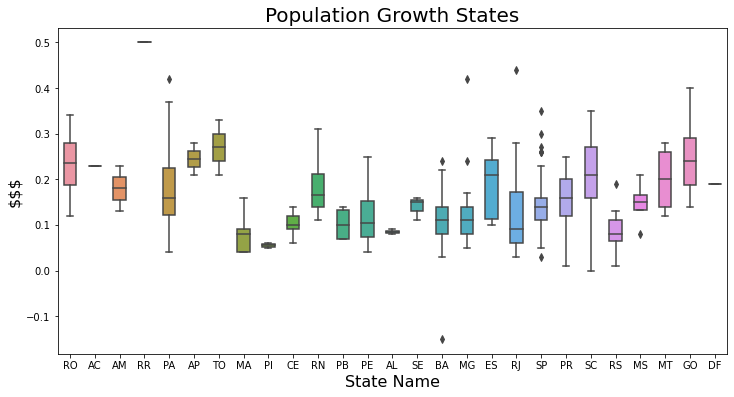

In [152]:
ax = sns.boxplot(y='population_growth_percent', x='state_acronym', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Population Growth States', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('State Name', fontsize=16)
ax


<AxesSubplot:title={'center':'% Gdp Growth States'}, xlabel='State Name', ylabel='$$$'>

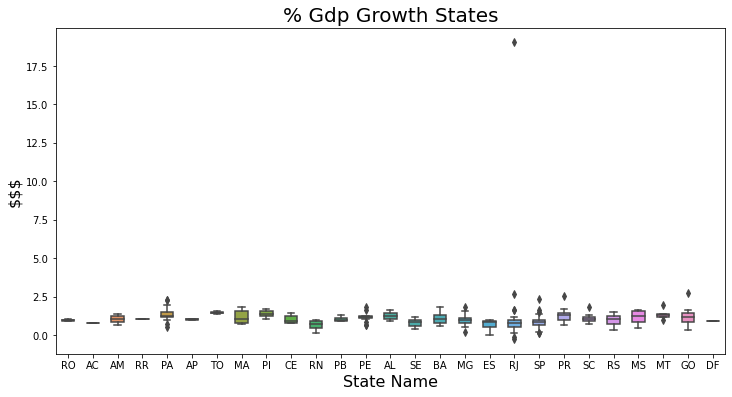

In [153]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent', x='state_acronym', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Gdp Growth States', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('State Name', fontsize=16)
ax

<AxesSubplot:title={'center':'% Gdp Growth Greater Region'}, xlabel='Greater Region Name', ylabel='$$$'>

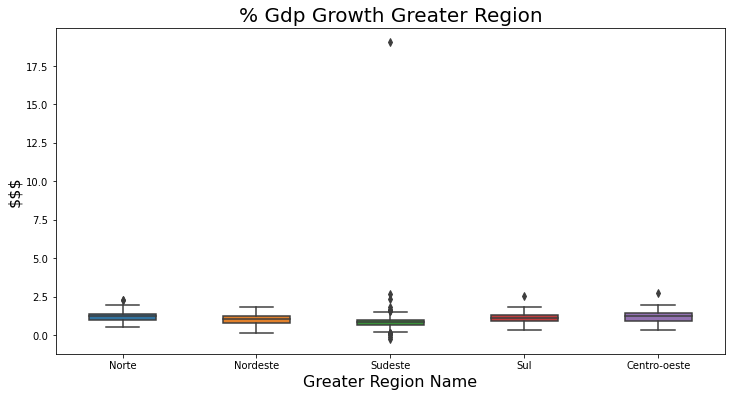

In [154]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent', x='greater_region_name', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Gdp Growth Greater Region', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Greater Region Name', fontsize=16)
ax

<AxesSubplot:title={'center':'% Gdp Growth Greater Region'}, xlabel='Greater Region Name', ylabel='$$$'>

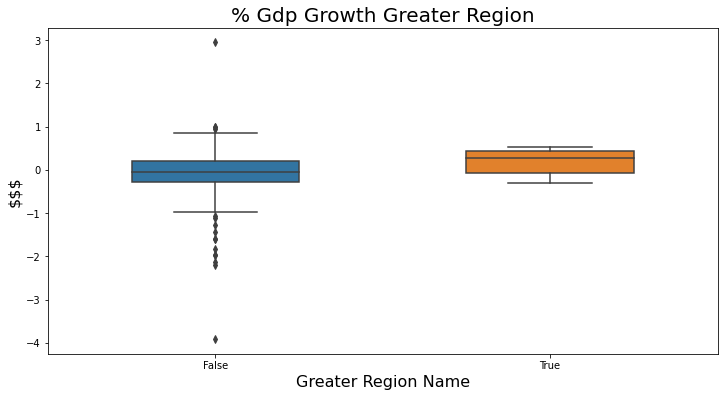

In [159]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_matopiba', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Gdp Growth Greater Region Matopiba', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Matopiba', fontsize=16)
ax

In [155]:
dados_2019_100k_cities = dados_2019_100k_cities.sort_values(by=['total_gdp_1000_brl_growth_percent'], ascending=False)
dados_2019_100k_cities.head(10)

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
53330,3302700,2019,Maricá,RJ,Sudeste,3,Região Metropolitana do Rio de Janeiro,False,False,False,...,False,2553,167668.0,False,True,True,True,12.357768,2.697326,2.946017
55661,5220454,2019,Senador Canedo,GO,Centro-oeste,5,Região Metropolitana de Goiânia,False,False,False,...,False,1859,121447.0,False,False,False,True,10.390286,0.542324,1.000632
53337,3303302,2019,Niterói,RJ,Sudeste,3,Região Metropolitana do Rio de Janeiro,False,False,False,...,False,2547,516981.0,False,True,True,True,11.414693,0.920283,0.993252
54136,4107652,2019,Fazenda Rio Grande,PR,Sul,4,Região Metropolitana de Curitiba,False,False,False,...,False,2856,103750.0,False,False,False,True,10.127609,0.636577,0.936093
53550,3515004,2019,Embu das Artes,SP,Sudeste,3,Região Metropolitana de São Paulo,False,False,True,...,False,2632,279264.0,False,False,False,True,10.893010,0.667829,0.862890
50273,1500602,2019,Altamira,PA,Norte,1,,True,False,False,...,False,356,117320.0,False,False,False,False,10.096177,0.703098,0.832909
50331,1504208,2019,Marabá,PA,Norte,1,,True,False,False,...,False,598,287664.0,False,False,False,False,10.618209,0.565314,0.832909
55424,5107909,2019,Sinop,MT,Centro-oeste,5,,True,False,False,...,False,1320,148960.0,False,False,False,False,10.739142,0.285179,0.662688
50385,1507300,2019,São Félix do Xingu,PA,Norte,1,,True,False,False,...,False,739,135732.0,False,False,False,False,9.331519,0.076961,0.657520
52252,2925303,2019,Porto Seguro,BA,Nordeste,2,,False,False,False,...,False,1830,152529.0,False,True,True,False,10.031334,0.364643,0.620576


In [156]:
dados_2019_100k_cities = dados_2019_100k_cities.sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_100k_cities.head(10)

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,gdp_per_capita_brl_growth_percent_log,total_gdp_1000_brl_growth_percent_log
50253,1400100,2019,Boa Vista,RR,Norte,1,Região Metropolitana da Capital,True,False,False,...,True,314,436591.0,False,False,False,True,10.184222,-0.755023,0.058269
53356,3304524,2019,Rio das Ostras,RJ,Sudeste,3,,False,False,False,...,False,2506,159529.0,False,True,True,False,10.846989,NaN,NaN
52883,3145208,2019,Nova Serrana,MG,Sudeste,3,,False,False,False,...,False,2212,108241.0,False,False,False,False,10.127135,-0.198451,0.431782
50385,1507300,2019,São Félix do Xingu,PA,Norte,1,,True,False,False,...,False,739,135732.0,False,False,False,False,9.331519,0.076961,0.657520
55661,5220454,2019,Senador Canedo,GO,Centro-oeste,5,Região Metropolitana de Goiânia,False,False,False,...,False,1859,121447.0,False,False,False,True,10.390286,0.542324,1.000632
50355,1505536,2019,Parauapebas,PA,Norte,1,,True,False,False,...,False,675,218787.0,False,False,False,False,11.613712,-1.966113,-0.616186
55635,5218805,2019,Rio Verde,GO,Centro-oeste,5,,False,False,False,...,False,1980,247259.0,False,False,False,False,10.653964,-0.385662,0.215111
55447,5200258,2019,Águas Lindas de Goiás,GO,Centro-oeste,5,Região Integrada de Desenvolvimento do Distrit...,False,False,False,...,False,1754,222850.0,False,False,False,True,9.164511,-0.020203,0.494696
53795,3536505,2019,Paulínia,SP,Sudeste,3,Região Metropolitana de Campinas,False,False,True,...,False,2532,114508.0,False,False,False,True,12.741258,-0.020203,0.494696
54453,4202008,2019,Balneário Camboriú,SC,Sul,4,Região Metropolitana da Foz do Rio Itajaí,False,False,False,...,False,3004,149227.0,False,True,True,True,10.657843,-0.385662,0.190620
